## Detection of images containing vehicles of different classes


#### Dataset information:

- The data was collected to train a model to distinguish between images containing vehicles of different classes, so the whole problem is a classification problem.


The data is divided into 16 folders:
- `mixed` contains `907` images,
`bike` contains `864` images,
`truck` contains `730` images,
`car` contains `708` images,
`bicycle` contains `707` images,
`launch`contains `662` images,
`easybike`contains `616` images,
`van` contains `613` images,
`boat`contains `613` images,
`cng` contains `533` images,
`rickshaw` contains `495` images,
`bus` contains `450` images,
`tractor` contains `433` images,
`horsecart` contains `256` images,
`wheelbarrow` contains `237` images,
`leguna` contains `218` images.

The data set has been collected from Mendeley (https://data.mendeley.com/datasets/pwyyg8zmk5). This data has been chosen as it covers many of the vehicle types used in the roads of Dhaka. Thus the model we are building can predict more classifications of vehicles.

## Get Our Workspace Ready

* Import TensorFlow  ☑️
* Import TensorFlow Hub  ☑️

## 1.Imports from libraries


In [ ]:
# Import necessary tools
import pandas as pd
import numpy as np
import datetime as dt
import os
import os.path
from pathlib import Path
import glob
import cv2
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
import tensorflow_hub as hub


## Getting Our Data Ready (turning into Tensors)

With all machine learning models, our data has to be in numerical format. So that's what we'll be doing first. Turning our images into Tensors (numerical representation)

Let's start by accessing our data and checking our labels.


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## 2.Organizing Training and Testing Dataframes


In [ ]:
# Selecting Dataset Folder Paths
dir_ = Path('./drive/MyDrive/Vehicle Data Set')
filepaths = list(dir_.glob(r'**/*.jpg'))
# Mapping the labels
temp_ = list(map(lambda x: os.path.split(os.path.split(x)[1])[1], filepaths))
labels = []
for x in temp_:
  labels.append(x.split()[0])

# Paths & labels 
filepaths = pd.Series(filepaths, name = 'File').astype(str)
labels = pd.Series(labels, name='Label')

# Concatenating...
df = pd.concat([filepaths, labels], axis=1)

df = df.sample(frac = 1, random_state = 56).reset_index(drop = True)


In [ ]:
vc = df['Label'].value_counts()
vc

mixed          907
bike           864
truck          730
car            708
bicycle        707
launch         662
easybike       616
van            613
boat           613
cng            533
rickshaw       495
bus            450
tractor        433
horsecart      256
wheelbarrow    237
leguna         218
Name: Label, dtype: int64

In [ ]:
print(labels)

0       boat
1       boat
2       boat
3       boat
4       boat
        ... 
9037     van
9038     van
9039     van
9040     van
9041     van
Name: Label, Length: 9042, dtype: object


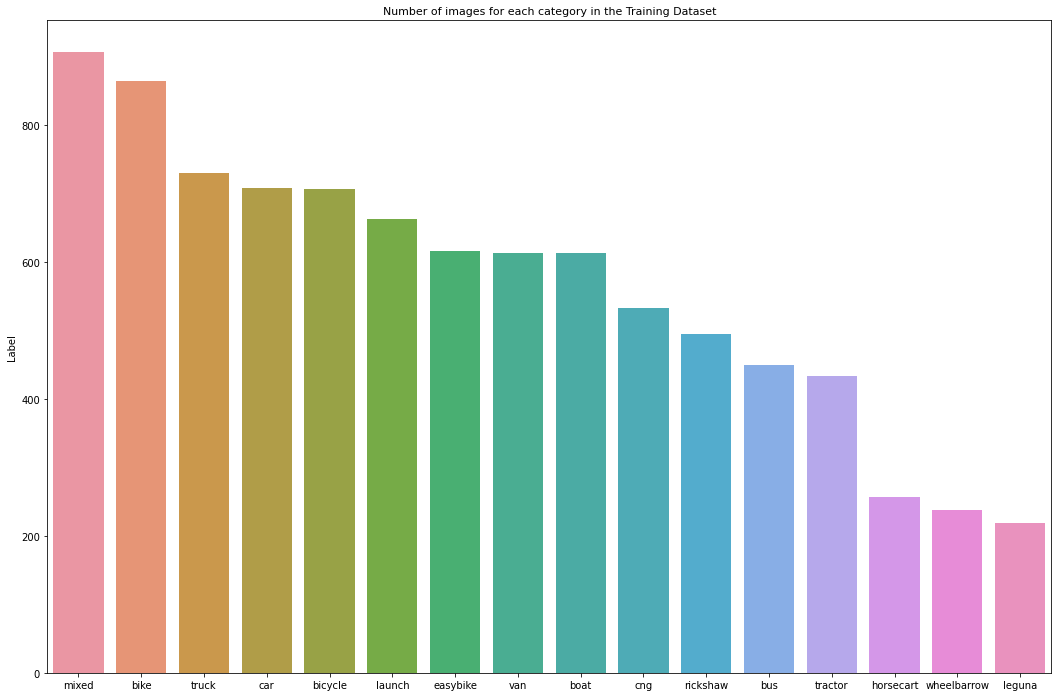

In [ ]:
vc = df['Label'].value_counts()
plt.figure(figsize = (18, 12))
sns.barplot(x = vc.index, y = vc)
plt.title("Number of images for each category in the Training Dataset", fontsize = 11)
plt.show()

## 3.Observing the Images

In [ ]:
plt.style.use("dark_background")

Text(0.5, 1.0, 'boat')

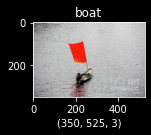

In [ ]:
figure = plt.figure(figsize=(2,2))
x = plt.imread(df["File"][34])
plt.imshow(x)
plt.xlabel(x.shape)
plt.title(df["Label"][34])

Text(0.5, 1.0, 'leguna')

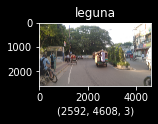

In [ ]:
figure = plt.figure(figsize=(2, 2))
x = plt.imread(df["File"][15])
plt.imshow(x)
plt.xlabel(x.shape)
plt.title(df["Label"][15])

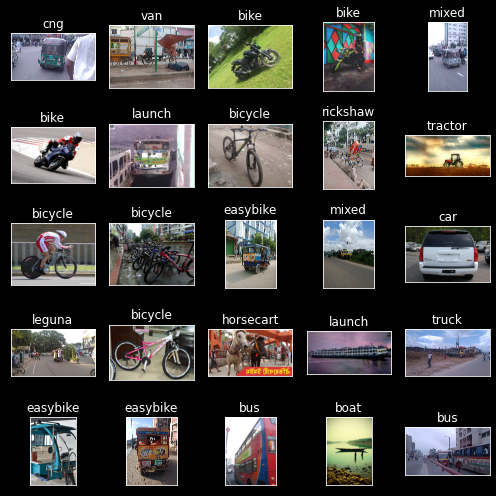

In [ ]:
fig, axes = plt.subplots(nrows = 5,
                        ncols = 5,
                        figsize = (7, 7),
                        subplot_kw = {"xticks":[],"yticks":[]})

for i,ax in enumerate(axes.flat):
    ax.imshow(plt.imread(df["File"][i]))
    ax.set_title(df["Label"][i])
plt.tight_layout()
plt.show()

In [ ]:
#Find the unique label values
unique_labels = np.unique(labels)
unique_labels

array(['bicycle', 'bike', 'boat', 'bus', 'car', 'cng', 'easybike',
       'horsecart', 'launch', 'leguna', 'mixed', 'rickshaw', 'tractor',
       'truck', 'van', 'wheelbarrow'], dtype=object)

In [ ]:
boolean_labels = [label == unique_labels for label in labels]
boolean_labels

[array([False, False,  True, False, False, False, False, False, False,
        False, False, False, False, False, False, False]),
 array([False, False,  True, False, False, False, False, False, False,
        False, False, False, False, False, False, False]),
 array([False, False,  True, False, False, False, False, False, False,
        False, False, False, False, False, False, False]),
 array([False, False,  True, False, False, False, False, False, False,
        False, False, False, False, False, False, False]),
 array([False, False,  True, False, False, False, False, False, False,
        False, False, False, False, False, False, False]),
 array([False, False,  True, False, False, False, False, False, False,
        False, False, False, False, False, False, False]),
 array([False, False,  True, False, False, False, False, False, False,
        False, False, False, False, False, False, False]),
 array([False, False,  True, False, False, False, False, False, False,
        False, Fals

In [ ]:
len(boolean_labels)

9042

In [ ]:
# Example: Turning boolean array into integers
print(labels[0]) # original label
print(np.where(unique_labels == labels[0])) # index where label occurs
print(boolean_labels[0].argmax()) # index where label occurs in boolean array
print(boolean_labels[0].astype(int)) # there will be 1 where sample label occurs

boat
(array([2]),)
2
[0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0]


In [ ]:
# Setup X & y variables
X = filepaths
y = boolean_labels
print(X)
print(y)

Streaming output truncated to the last 5000 lines.
       False, False, False, False, False, False, False]), array([False, False, False,  True, False, False, False, False, False,
       False, False, False, False, False, False, False]), array([False, False, False,  True, False, False, False, False, False,
       False, False, False, False, False, False, False]), array([False, False, False,  True, False, False, False, False, False,
       False, False, False, False, False, False, False]), array([False, False, False,  True, False, False, False, False, False,
       False, False, False, False, False, False, False]), array([False, False, False,  True, False, False, False, False, False,
       False, False, False, False, False, False, False]), array([False, False, False,  True, False, False, False, False, False,
       False, False, False, False, False, False, False]), array([False, False, False,  True, False, False, False, False, False,
       False, False, False, False, False, False, Fals

### Creating  our own Validation Set

Since the dataset doesn't come with a validation set, we're going to create our own.

In [ ]:
# Let's split our data into train and validation sets
from sklearn.model_selection import train_test_split

# set aside 20% of train and test data for evaluation
X_train, X_test, y_train, y_test = train_test_split(X, y,
    test_size=0.2, shuffle = True, random_state = 8)

# Use the same function above for the validation set
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, 
    test_size=0.25, random_state= 8) # 0.25 x 0.8 = 0.2


## 4.Preprocessing Images (Turning images into Tensors)

To preprocess our images into Tensors we're going to write a function which does a few things:
1. Take an image filepath as input.
2. Use TensorFlow to read the file and save it to a variable `image`.
3. Turn our `image`(jpg) into Tensors.
4. Normalize our `image` (convert colour channel values from 0-255 to 0-1).
5. Resize the `image` to be of shape (224, 224).
6. Return the modified `image`.

Before we do, let's see what importing an image looks like.


In [ ]:
# Convert image to NumPy Array
from matplotlib.pyplot import imread
image = imread(filepaths[42])
image.shape

(1065, 1300, 3)

In [ ]:
# turn image into a tensor
tf.constant(image)[:2]

<tf.Tensor: shape=(2, 1300, 3), dtype=uint8, numpy=
array([[[71, 78, 86],
        [71, 78, 86],
        [71, 78, 86],
        ...,
        [58, 76, 88],
        [58, 76, 88],
        [58, 76, 88]],

       [[71, 78, 86],
        [71, 78, 86],
        [71, 78, 86],
        ...,
        [58, 76, 88],
        [58, 76, 88],
        [58, 76, 88]]], dtype=uint8)>

In [ ]:
image.max(), image.min()

(255, 0)

Now we've seen what an image looks like as a Tensor, let's make a function to preprocess them.


In [ ]:
# Define image size
IMG_SIZE = 224

# Create a function for preprocessing images.
def process_image(image_path, img_size=IMG_SIZE):
    """
    Takes an image file path and turns the image into a Tensor
    """
    # Read an image file
    image = tf.io.read_file(image_path)
    # Turn the jpg image into numerical Tensor with 3 colour channels (Red, Green, Blue)
    image = tf.image.decode_jpeg(image, channels=3)
    # Convert the colour channel values from 0-255 to 0-1 values (normalization)
    image = tf.image.convert_image_dtype(image, dtype=tf.float32)
    # Resize the image to our desired value (244,244)
    image = tf.image.resize(image, size=[IMG_SIZE, IMG_SIZE])

    return image

## 5.Turning Our Data Into Batches

Why turn our data into batches ?

Let's say you're trying to process 10,000+ images in one go, they all might not fit into memory.

So, that's why we do about 32 (batch size) images at a time (we can manually adjust batch size if it's needed).

In order to use TensorFlow effectively, we need our data in the form of Tensor tuples which looks like this:

`(image, label)`


In [ ]:
# Create a simple function to return a tuple (image, label)
def get_image_label(image_path, label):
    """
    Takes an image file path name and the associated label,
    processes the image and returns a tuple if (image, label).
    """
    image = process_image(image_path)
    return image, label

In [ ]:
# Demo of the above
process_image(X[42], tf.constant(y[42]))

<tf.Tensor: shape=(224, 224, 3), dtype=float32, numpy=
array([[[0.27058825, 0.30588236, 0.3254902 ],
        [0.26586136, 0.30115548, 0.32076332],
        [0.2549327 , 0.29022682, 0.30983466],
        ...,
        [0.2509804 , 0.28627452, 0.34509805],
        [0.25049895, 0.28579307, 0.3446166 ],
        [0.22854546, 0.29598185, 0.3446166 ]],

       [[0.2627451 , 0.29803923, 0.31764707],
        [0.25439325, 0.28968737, 0.3092952 ],
        [0.26525736, 0.30055147, 0.32015932],
        ...,
        [0.25735682, 0.29265094, 0.35147446],
        [0.25882354, 0.29411766, 0.3529412 ],
        [0.24805433, 0.3009653 , 0.3529412 ]],

       [[0.27903983, 0.31433395, 0.3339418 ],
        [0.2627451 , 0.29803923, 0.31764707],
        [0.2627451 , 0.29803923, 0.31764707],
        ...,
        [0.26818103, 0.30347514, 0.36229867],
        [0.27089936, 0.30619347, 0.365017  ],
        [0.2540091 , 0.29652488, 0.3529412 ]],

       ...,

       [[0.9960785 , 0.9960785 , 0.9960785 ],
        [0.99

Now we've got a way to turn our data into tuples of Tensors

in the form: (image,label)

Let's make a function to turn all of our data (X & y) into batches!


In [ ]:
# Define the batch size, 32 is a good start
BATCH_SIZE = 32

# Create a function to turn data into batches
def create_data_batches(X, y=None, batch_size=BATCH_SIZE, valid_data=False, test_data=False):
    """
    Create batches of data out of image (X) and label (y) pairs.
    Shuffles the data if it's training data but doesn't shuffle if it's validation data.
    Also accepts test data as input (no labels).
    """
    # If the data is a test dataset, we probably don't have labels
    if test_data:
        print("Creating test data batches...")
        # Turns the filepaths and labels into Tensors
        data = tf.data.Dataset.from_tensor_slices((tf.constant(X),
                                                   tf.constant(y)))

        # Preprocess the images
        data = data.map(get_image_label)

        # Turns the test data into batches
        data_batch = data.batch(BATCH_SIZE)
        
        return data_batch

    # # If the data is a valid dataset, we don't need to shuffle it
    elif valid_data:
        print("Creating valid data batches...")
        # Turn the filepaths and labels into Tensors
        data = tf.data.Dataset.from_tensor_slices((tf.constant(X),  # filepaths
                                                   tf.constant(y))) # labels
        
        # Create (image,label) tuples (this also turns the image path into preprocessed image)
        data = data.map(get_image_label)

        # Turns the training data into batches
        data_batch = data.batch(BATCH_SIZE)
        
        return data_batch

    
    else:
        print("Creating training data batches...")
        # Turn the filepaths and labels into Tensors
        data = tf.data.Dataset.from_tensor_slices((tf.constant(X),  # filepaths
                                                   tf.constant(y))) # labels
        # Shuffling pathnames and labels before mapping image processor function is faster than shuffling images
        data = data.shuffle(buffer_size=len(X))
        
        # Create (image,label) tuples (this also turns the image path into preprocessed image)
        data = data.map(get_image_label)

        # Turns the training data into batches
        data_batch = data.batch(BATCH_SIZE)
        
        return data_batch
        

In [ ]:
# Create training and validation batches
train_data = create_data_batches(X_train, y_train)
validation_data = create_data_batches(X_val, y_val,valid_data=True)
test_data = create_data_batches(X_test, y_test,test_data=True)

Creating training data batches...
Creating valid data batches...
Creating test data batches...


In [ ]:
# Check out the different attributes of our data batches
train_data.element_spec, test_data.element_spec

((TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None),
  TensorSpec(shape=(None, 16), dtype=tf.bool, name=None)),
 (TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None),
  TensorSpec(shape=(None, 16), dtype=tf.bool, name=None)))

In [ ]:
len(train_data), len(test_data)

(170, 57)

## 6.Visualizing Data Batches

Our data is now in batches, however, these can be a little hard to understand/comprehend, let's visualize them !

In [ ]:
# Create a function for viewing images in a data batch
def show_25_images(images, labels):
    """
    Displays a plot of 25 images and their labels from a data batch
    """
    # Setup the figure
    plt.figure(figsize = (15, 15))
    # Loop through 25 (for displaying 25 images)
    for i in range(25):
        # Create subplots (5 rows, 5 columns)
        ax = plt.subplot(5, 5, i+1)
        # Display an image
        plt.imshow(images[i])
        # Add the image label as the title
        plt.title(unique_labels[labels[i].argmax()])
        # Turn the grid lines off
        plt.axis("off")

In [ ]:
train_images, train_labels = next(train_data.as_numpy_iterator())
train_images, train_labels

(array([[[[0.719808  , 0.79431784, 0.8609845 ],
          [0.7207083 , 0.7890557 , 0.8588036 ],
          [0.71808726, 0.79091644, 0.85674274],
          ...,
          [0.6069645 , 0.6579449 , 0.7246116 ],
          [0.60946745, 0.66044784, 0.7240333 ],
          [0.60168046, 0.6619045 , 0.7222288 ]],
 
         [[0.71010405, 0.7846139 , 0.85128057],
          [0.7047619 , 0.78873557, 0.8505403 ],
          [0.69289714, 0.767407  , 0.83407366],
          ...,
          [0.594299  , 0.6570441 , 0.71586764],
          [0.5919386 , 0.642919  , 0.70958567],
          [0.6059022 , 0.6686473 , 0.7288714 ]],
 
         [[0.7232493 , 0.79669875, 0.8665467 ],
          [0.71678674, 0.79913974, 0.8663666 ],
          [0.70556223, 0.7879152 , 0.8545819 ],
          ...,
          [0.60754305, 0.6663666 , 0.7408764 ],
          [0.59236044, 0.65510553, 0.7178506 ],
          [0.5918368 , 0.6545819 , 0.7164864 ]],
 
         ...,
 
         [[0.58695567, 0.5673478 , 0.48107332],
          [0.58925

In [ ]:
len(train_images),len(train_labels)

(32, 32)

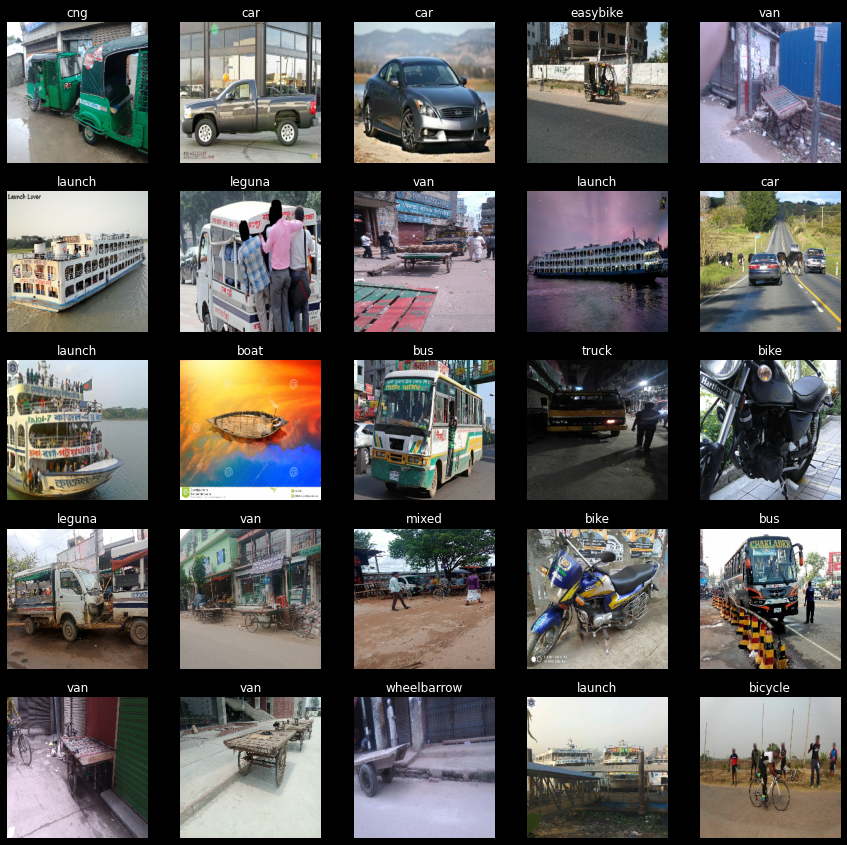

In [ ]:
# Now lets visualize the data in a training batch
train_images, train_labels = next(train_data.as_numpy_iterator())
show_25_images(train_images, train_labels)

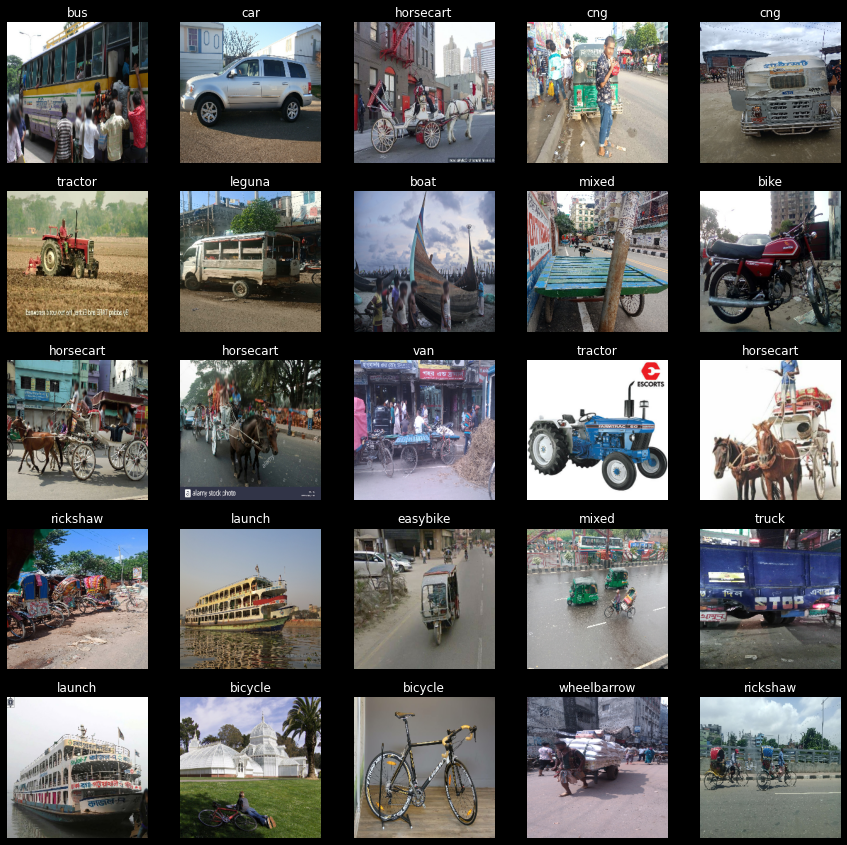

In [ ]:
# Now let's visualize our validation set
val_images, val_labels = next(validation_data.as_numpy_iterator())
show_25_images(val_images,val_labels)

## 7.Building a Model

Before we build a model, there are a few things we need to define:
* The input shape (our images shape, in the form of Tensors) to our model.
* The output shape (image labels, in the form of Tensors) to our model.
* The URL of the model we want to use from TensorFlow Hub - https://tfhub.dev/google/imagenet/mobilenet_v2_130_224/classification/5

In [ ]:
# Setup input shape to the model
INPUT_SHAPE = [None, IMG_SIZE, IMG_SIZE, 3] # batch, height, width, colour channels

# Setup output shape of our model
OUTPUT_SHAPE = len(unique_labels)

# Setup model URL from TensorFLow Hub
MODEL_URL = "https://tfhub.dev/google/imagenet/mobilenet_v2_130_224/classification/5"

Now we've got our inputs, outputs and model ready to go. Let's put them together into a Keras deep learning model.

Knowing this, let's create a function which:

* Takes the input shape, output shape and model chosen as parameters.
* Defines the layers in a Keras model in sequential fashion. (do this first, then that).
* Compiles the model (says it should be evaluated and improved).
* Builds the model (tells the model the input shape it'll be getting).
* Returns the model.

In [ ]:
# Create a function which builds a Keras Model
def create_model(input_shape=INPUT_SHAPE, output_shape=OUTPUT_SHAPE, model_url=MODEL_URL):
    print(f"Building model with: {MODEL_URL}")

    # Setup the model layers
    model = tf.keras.Sequential([
                                 hub.KerasLayer(MODEL_URL), # Layer 1 (input 1)
                                 tf.keras.layers.Dense(units=OUTPUT_SHAPE,
                                                       activation="softmax")    # Layer 2 (output layer)

    ])

    # Compile the model
    model.compile(
        loss=tf.keras.losses.CategoricalCrossentropy(),
        optimizer=tf.keras.optimizers.RMSprop(),
        metrics=["accuracy",tf.keras.metrics.Precision(name='precision'),tf.keras.metrics.Recall(name='recall')])


    # Build the model
    model.build(INPUT_SHAPE)

    return model

In [ ]:
model = create_model()
model.summary()

Building model with: https://tfhub.dev/google/imagenet/mobilenet_v2_130_224/classification/5
Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer_1 (KerasLayer)  (None, 1001)              5432713   
                                                                 
 dense_1 (Dense)             (None, 16)                16032     
                                                                 
Total params: 5,448,745
Trainable params: 16,032
Non-trainable params: 5,432,713
_________________________________________________________________


## 8.Creating Callbacks

Callbacks are helper functions a model can use during training to do such things as save it's progress, check it's progress or stop training early if a model stops improving.


### Early Stopping Callback

Early stopping helps stop our model from overfitting by stopping training if a certain evaluation metrics stop improving.

https://www.tensorflow.org/api_docs/python/tf/keras/callbacks/EarlyStopping

In [ ]:
# Create Early Stopping Callback
early_stopping = tf.keras.callbacks.EarlyStopping(monitor="val_accuracy",
                                                 patience=3)

## 9.Training a Model 




In [ ]:
NUM_EPOCHS = 100 #@param {type:"slider", min:1, max:100, step:10}

Let's create a function which trains a model.
* Create a model using `create_model()`.
* Setup a TensorBoard callback using `create_tensorboard_callback`.
* Call the `fit()` function on our model passing it the training data, validation data, number of epochs to train for(`NUM_EPOCHS`) and the callbacks we would like to use.
* Return the model.

In [ ]:
# Build a function to train and return a trained model
def train_model():
    """
    Trains a given model and returns the trained version.
    """
    # Create a model
    model = create_model()
    # Fit the model to the data passing it the callbacks we created
    model.fit(x=train_data,
              epochs=NUM_EPOCHS,
              validation_data=validation_data,
              validation_freq=1,
              callbacks=[early_stopping])
    # Reurn the fitted model
    return model

In [ ]:
# Fit the model to the data
model = train_model()

Building model with: https://tfhub.dev/google/imagenet/mobilenet_v2_130_224/classification/5
Epoch 1/100
170/170 [==============================] - 1192s 7s/step - loss: 0.8890 - accuracy: 0.7317 - precision: 0.8390 - recall: 0.6410 - val_loss: 0.5910 - val_accuracy: 0.8209 - val_precision: 0.8643 - val_recall: 0.7745
Epoch 2/100
170/170 [==============================] - 730s 4s/step - loss: 0.4430 - accuracy: 0.8588 - precision: 0.8948 - recall: 0.8217 - val_loss: 0.5473 - val_accuracy: 0.8353 - val_precision: 0.8700 - val_recall: 0.7877
Epoch 3/100
170/170 [==============================] - 735s 4s/step - loss: 0.3515 - accuracy: 0.8859 - precision: 0.9138 - recall: 0.8601 - val_loss: 0.4939 - val_accuracy: 0.8364 - val_precision: 0.8652 - val_recall: 0.8126
Epoch 4/100
170/170 [==============================] - 712s 4s/step - loss: 0.2880 - accuracy: 0.9019 - precision: 0.9228 - recall: 0.8855 - val_loss: 0.5064 - val_accuracy: 0.8375 - val_precision: 0.8623 - val_recall: 0.8137
Ep

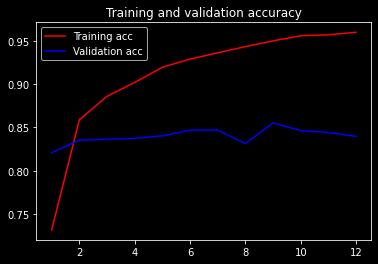

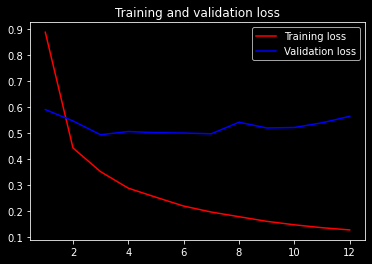

In [ ]:
acc = model.history.history['accuracy']
val_acc = model.history.history['val_accuracy']
loss = model.history.history['loss']
val_loss = model.history.history['val_loss']
epochs = range(1, len(acc) + 1)

plt.title('Training and validation accuracy')
plt.plot(epochs, acc, 'red', label='Training acc')
plt.plot(epochs, val_acc, 'blue', label='Validation acc')
plt.legend()

plt.figure()
plt.title('Training and validation loss')
plt.plot(epochs, loss, 'red', label='Training loss')
plt.plot(epochs, val_loss, 'blue', label='Validation loss')

plt.legend()

plt.show()

## 10.Making and evaluating predictions using a trained model.


In [ ]:
# Make predictions on the validation data
predictions = model.predict(validation_data, verbose=1)
predictions

57/57 [==============================] - 222s 4s/step


array([[8.9418783e-05, 5.6001663e-06, 1.3487735e-05, ..., 6.8826586e-05,
        9.7402776e-08, 4.2878034e-07],
       [2.8846595e-10, 1.4862873e-09, 3.3160014e-10, ..., 3.3022705e-08,
        3.7342889e-09, 2.8909772e-10],
       [5.4167469e-07, 1.8784037e-08, 8.3389878e-10, ..., 4.3914219e-10,
        1.1655280e-06, 6.2506464e-05],
       ...,
       [3.0101402e-04, 9.9880660e-01, 1.8239252e-06, ..., 7.2309631e-06,
        2.4434288e-05, 1.2728692e-08],
       [3.3713837e-05, 3.6657234e-08, 1.6035356e-08, ..., 8.2729763e-08,
        2.3017054e-05, 6.8939063e-09],
       [5.4533036e-08, 1.0976144e-06, 2.2762723e-07, ..., 1.8773673e-02,
        1.1928753e-07, 7.5458324e-08]], dtype=float32)

In [ ]:
predictions.shape

(1809, 16)

In [ ]:
# Turn prediction probabilities into their respective level (easier to understand)
def get_pred_label(prediction_probabilities):
    """
    Turns an array of prediction probabilities into a label.
    """
    return unique_labels[np.argmax(prediction_probabilities)]

In [ ]:
# Get a predicted label on an array of prediction probabilities
pred_label = get_pred_label(predictions[100])
pred_label

'bike'

In [ ]:
# Create a function to unbatch a batch dataset
def unbatchify(data):
    """
    Takes a batched dataset of (image, label) Tensors and returns separate arrays of images
    and labels.
    """
    images = []
    labels = []
    # Loop through unbatched data
    for image, label in data.unbatch().as_numpy_iterator():
        images.append(image)
        labels.append(unique_labels[np.argmax(label)])
    return images, labels

In [ ]:
# Unbatchify the validation data
val_images, val_labels = unbatchify(validation_data)
val_images[0], val_labels[0]

(array([[[1.        , 1.        , 1.        ],
         [1.        , 1.        , 1.        ],
         [1.        , 1.        , 1.        ],
         ...,
         [0.10588236, 0.14901961, 0.15686275],
         [0.10061853, 0.16336362, 0.16336362],
         [0.10325649, 0.16600157, 0.16600157]],
 
        [[1.        , 1.        , 1.        ],
         [1.        , 1.        , 1.        ],
         [1.        , 1.        , 1.        ],
         ...,
         [0.10588236, 0.14901961, 0.15686275],
         [0.10295866, 0.16570376, 0.16570376],
         [0.10563153, 0.16837662, 0.16837662]],
 
        [[1.        , 1.        , 1.        ],
         [1.        , 1.        , 1.        ],
         [1.        , 1.        , 1.        ],
         ...,
         [0.10826711, 0.15140437, 0.1592475 ],
         [0.10610425, 0.16884935, 0.16884935],
         [0.10560998, 0.16835506, 0.16835506]],
 
        ...,
 
        [[0.46888897, 0.45766336, 0.5216677 ],
         [0.40166855, 0.3696959 , 0.42445

Now we've got ways to get:

Prediction labels.
Validation labels (truth labels).
Validation images.
Now let's make some functions to make these all a bit more visual.

We'll create a function which:

Takes an array of prediction probabilities, an array of truth labels and an array of images and an integer.
Convert the prediction probabilities to a predicted label.
Plot the predicted label, it's predicted probability, the truth label and the target image on a single plot.

In [ ]:
def plot_pred(prediction_probabilities, labels, images, n=1):
    """
    View the prediction, ground truth and image for sample n
    """
    pred_prob, true_label, image = prediction_probabilities[n], labels[n], images[n]

    # Get the pred label
    pred_label = get_pred_label(pred_prob)

    # Plot image and remove ticks
    plt.imshow(image)
    plt.xticks([])
    plt.yticks([])

    # Change the color of the title depending on if the prediction is right or wrong
    if pred_label == true_label:
        color = "green"
    else:
        color = "red"


    # Change plot title to be predicted, probability of prediction and truth label
    plt.title(f"{pred_label} {np.max(pred_prob) * 100:0.2f}% {true_label}",color=color)

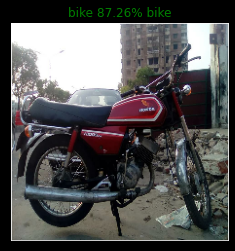

In [ ]:
plot_pred(prediction_probabilities=predictions,
          labels=val_labels,
          images=val_images,
          n=9)

## 11.Saving and Reloading a Trained Model

In [ ]:
# Create a function to save a model
def save_model(model, suffix=None):
    """
    Saves a given model in a models directory and appends a suffix (string).
    """
    # Create a model directory pathname with current time
    model_dir = os.path.join("drive/MyDrive/ML Project/models",
                             datetime.datetime.now().strftime("%Y%m%d-%H%M%s"))
    model_path = f"{model_dir}-{suffix}.h5"
    print(f"Saving model to: {model_path}")
    model.save(model_path)
    return model_path

In [ ]:
# Create a function to load a trained model
def load_model(model_path):
    """
    Loads a saved model from a specified path.
    """
    print(f"Loading a saved model from: {model_path}")
    model = tf.keras.models.load_model(model_path,
                                       custom_objects={"KerasLayer":hub.KerasLayer})
    return model

In [ ]:
# Save our model 
save_model(model, suffix="Vehicle_detection")

Saving model to: drive/MyDrive/ML Project/models/20220205-15101644073857-Vehicle_detection.h5


'drive/MyDrive/ML Project/models/20220205-15101644073857-Vehicle_detection.h5'

In [ ]:
# Load a trained model
full_model = load_model("drive/MyDrive/ML Project/models/20220205-15101644073857-Vehicle_detection.h5")

Loading a saved model from: drive/MyDrive/ML Project/models/20220205-15101644073857-Vehicle_detection.h5


## 12.Making Predictions on the test dataset

Since our model has been trained on images in the form of Tensor batches, to make predictions on the test data, we'll have to get it into same format.

Luckily we created `create_data_batches()` earlier which can take a list of filenames as input and convert them into Tensor batches.

To make predictions on the test data, we'll:
* Make a prediction array by passing the test batches to the `predict()` method called on our model.

In [ ]:
# Make predictions on test data batch using the loaded full model
test_predictions = full_model.predict(test_data,
                                             verbose=1)
test_predictions

# test_predictions = np.argmax(test_predictions, axis=1)

57/57 [==============================] - 339s 6s/step


array([[1.45014133e-06, 1.06805125e-08, 6.31374064e-10, ...,
        1.00169702e-04, 3.30676048e-05, 4.07886454e-08],
       [8.60457885e-12, 4.30821512e-09, 2.41709874e-10, ...,
        8.22603496e-08, 1.31155457e-06, 1.44751562e-08],
       [2.89086585e-14, 8.27636715e-09, 1.78817121e-08, ...,
        9.87895131e-01, 4.07725338e-08, 1.60544673e-07],
       ...,
       [4.54366358e-07, 8.58099369e-08, 3.83602043e-07, ...,
        6.43589377e-01, 6.62634266e-04, 7.93037174e-08],
       [1.72822166e-03, 8.07226300e-01, 8.52273956e-07, ...,
        1.68358911e-05, 2.19342299e-04, 9.84497456e-05],
       [9.99999762e-01, 5.33576490e-08, 1.78951574e-08, ...,
        2.68311773e-09, 3.28054051e-09, 7.36898931e-10]], dtype=float32)

In [ ]:
test_images, test_labels = unbatchify(test_data)

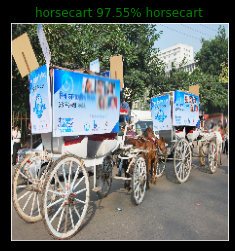

In [ ]:
plot_pred(prediction_probabilities=test_predictions,
          labels=test_labels,
          images=test_images,
          n=100)

In [ ]:
test_predictions_ = np.argmax(test_predictions, axis=1)
test_predictions_

array([10,  5, 13, ..., 13,  1,  0])

## 13.Checking Accuracy using Sklearn Metrics

In [ ]:
import sklearn.metrics

In [ ]:
y_preds = []
for i in test_predictions_:
  bool_ = []
  for y in range(len(unique_labels)):
    if y != i :
      bool_.append(False)
    else:
      bool_.append(True)
  y_preds.append(bool_)


In [ ]:
import numpy
acc = sklearn.metrics.accuracy_score(y_test, y_preds)
acc

0.839690436705362